# Taylor Woodington
# Tourism Business Patterns

In [2]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Set style for seaborn
sns.set(style='whitegrid')

In [3]:
# Load Dataset
file_path = r"C:\Users\Shaun\Downloads\tourism_dataset.csv"
data = pd.read_csv(file_path)

# Ensure Load
print(data.head(5))

     Location Country    Category  Visitors  Rating    Revenue  \
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24   

  Accommodation_Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                      No  


In [4]:
# Check the shape of the dataset
print(f'Dataset shape: {data.shape}')

# Check data types and non-null counts
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

Dataset shape: (5989, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.7+ KB
None
            Visitors       Rating        Revenue
count    5989.000000  5989.000000    5989.000000
mean   501016.089497     3.009347  499479.367253
std    289783.294978     1.155980  286743.225211
min      1108.000000     1.000000    1025.810000
25%    252789.000000     2.010000  251410.450000
50%    500831.000000

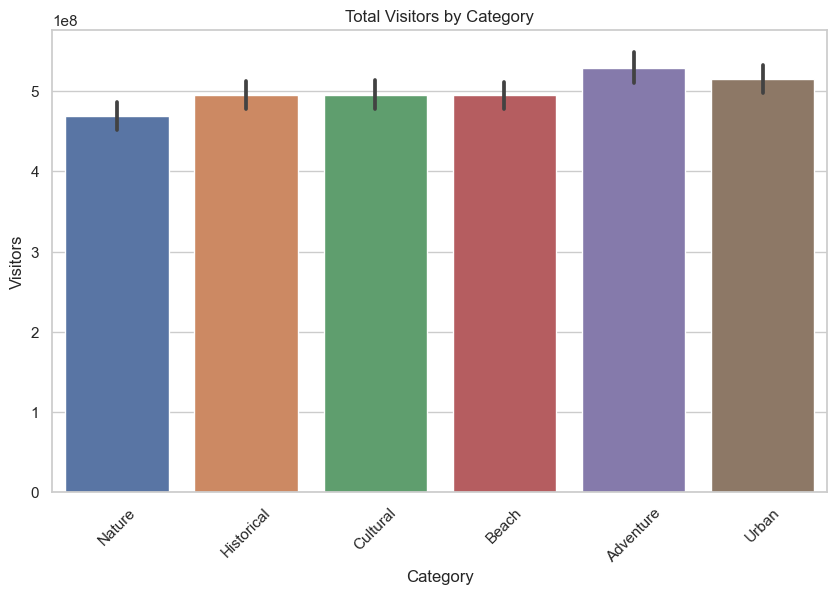

In [82]:
# Bar plot of total visitors by category
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Category', y='Visitors', estimator=sum)
plt.title('Total Visitors by Category')
plt.xticks(rotation=45)
plt.show()

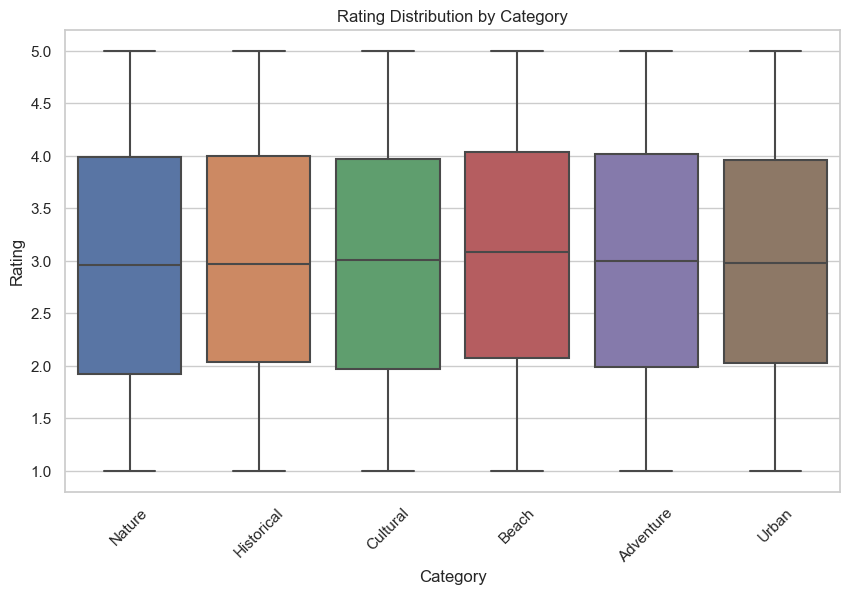

In [83]:
# Box plot of ratings by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Category', y='Rating')
plt.title('Rating Distribution by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


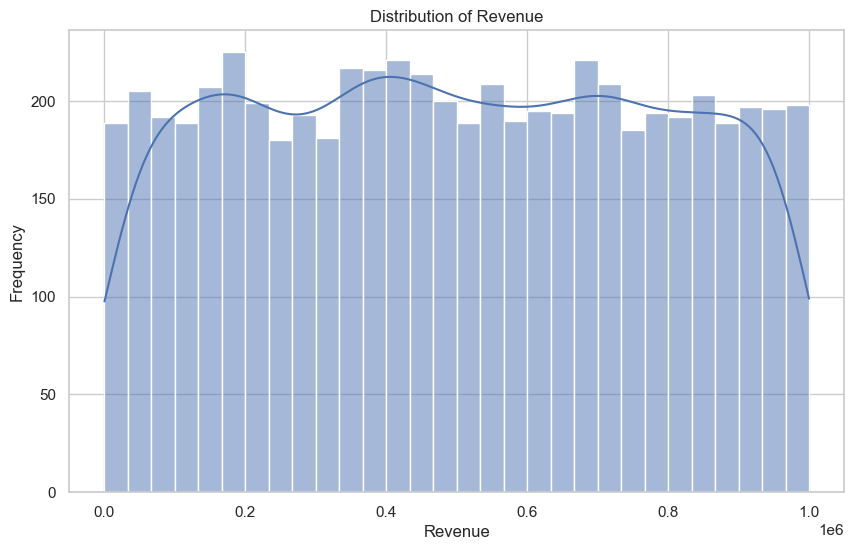

In [84]:
# Histogram of Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data['Revenue'], bins=30, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

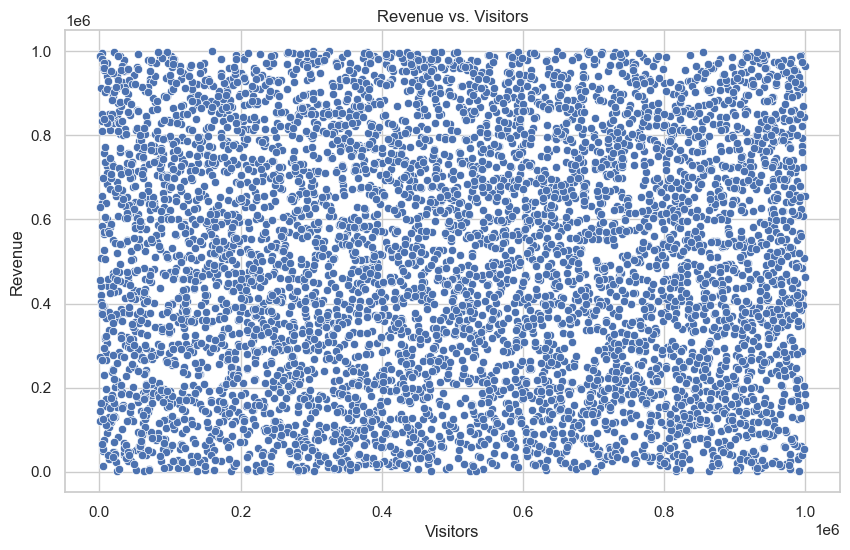

In [85]:
# Scatter plot of Revenue vs. Visitors
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Visitors', y='Revenue')
plt.title('Revenue vs. Visitors')
plt.xlabel('Visitors')
plt.ylabel('Revenue')
plt.show()

Top 5 locations by attendance:
         Country  Visitors  Rating    Revenue
5151      China    999982    3.00  656615.31
2311      Egypt    999891    4.00  462329.96
2982     France    999855    3.44  157466.43
1930  Australia    999750    4.15  184504.30
2030  Australia    999664    2.71  966022.60


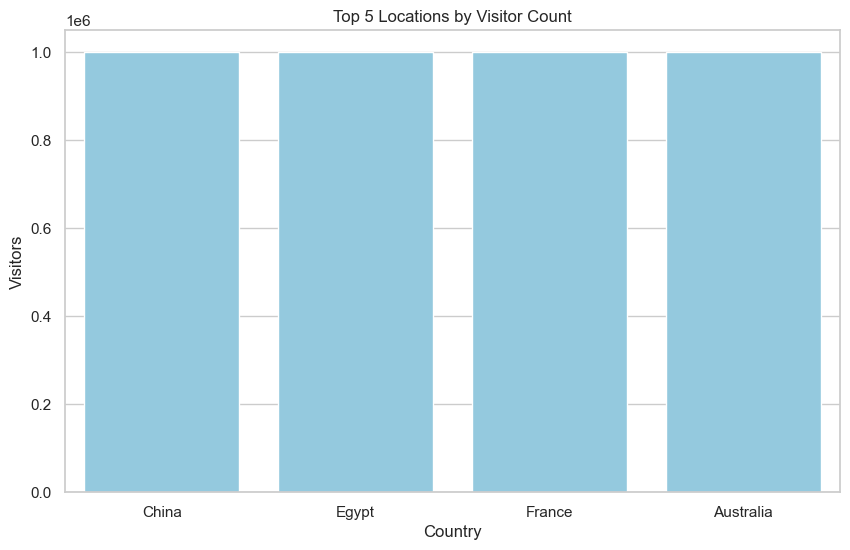

In [86]:
# Additional EDA
# Top 5 locations with the highest attendance
top_attendance = data.nlargest(5, 'Visitors')[['Country', 'Visitors', 'Rating', 'Revenue']]
print("Top 5 locations by attendance:\n", top_attendance)

# Plot top locations by visitor count 
plt.figure(figsize=(10, 6))
sns.barplot(data=top_attendance, x='Country', y='Visitors', color='skyblue')
plt.title("Top 5 Locations by Visitor Count")
plt.show()

Bottom 5 locations by attendance:
      Country  Visitors  Rating    Revenue
2595   Egypt      1108    4.97  144382.70
2310  Brazil      1261    4.37  988784.58
2845   India      1382    2.82  120860.46
4298   China      1385    4.35  629597.22
4160     USA      1441    1.26  457094.93


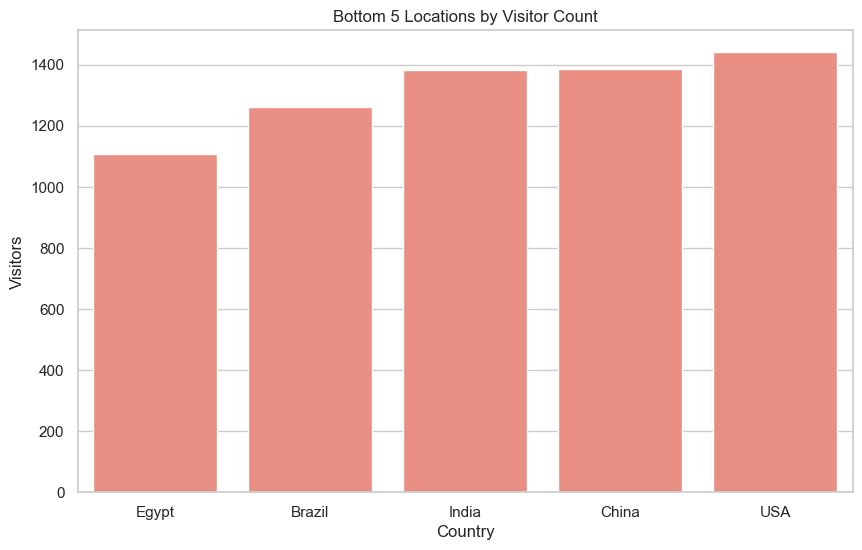

In [87]:
# Bottom 5 locations with the lowest attendance
bottom_attendance = data.nsmallest(5, 'Visitors')[['Country', 'Visitors', 'Rating', 'Revenue']]
print("Bottom 5 locations by attendance:\n", bottom_attendance)

# Plot bottom locations by visitor count
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_attendance, x='Country', y='Visitors', color='salmon')
plt.title("Bottom 5 Locations by Visitor Count")
plt.show()


<Figure size 1200x800 with 0 Axes>

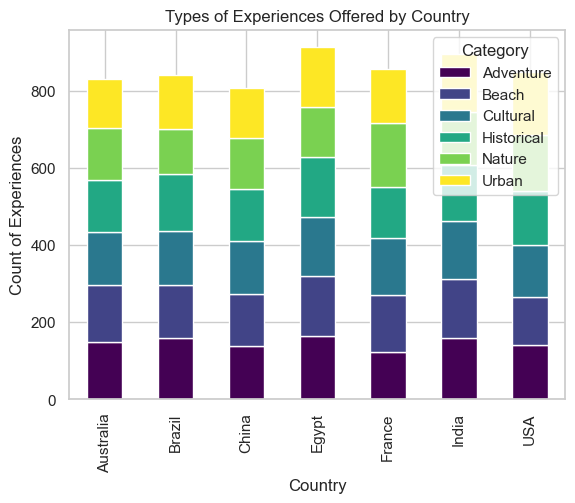

In [88]:
# Count experiences per country
experience_counts = data.groupby(['Country', 'Category']).size().unstack(fill_value=0)

# Plot experience counts by country
plt.figure(figsize=(12, 8))
experience_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Types of Experiences Offered by Country")
plt.xlabel("Country")
plt.ylabel("Count of Experiences")
plt.legend(title="Category")
plt.show()

In [14]:
# Linear Regression Model

# Encode Accommodation_Available as a binary variable
data['Accommodation_Available'] = LabelEncoder().fit_transform(data['Accommodation_Available'])

# Define the feature matrix X and target vector y
X = data[['Rating', 'Revenue', 'Accommodation_Available']]
y = data['Visitors']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Print the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients of the model:\n", coefficients)

Mean Squared Error: 85075903396.67247
R-squared: -0.0040597092792253875
Coefficients of the model:
                           Coefficient
Rating                   -8303.233417
Revenue                      0.012439
Accommodation_Available -18217.150072


THE MSE is very large with a negative R-squared score and mainly negative coefficients indicates that this model was not a very good predictor for visitor count. However, there was a slightly positive relationship with the Revenue. 

Time to try something else: Random Forest Regression.

In [16]:
# Random Forest Regressional Analysis
# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

# Print MSE and R-Squared
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r_squared_rf}")

Random Forest Mean Squared Error: 97253862389.5327
Random Forest R-squared: -0.14778310777168024


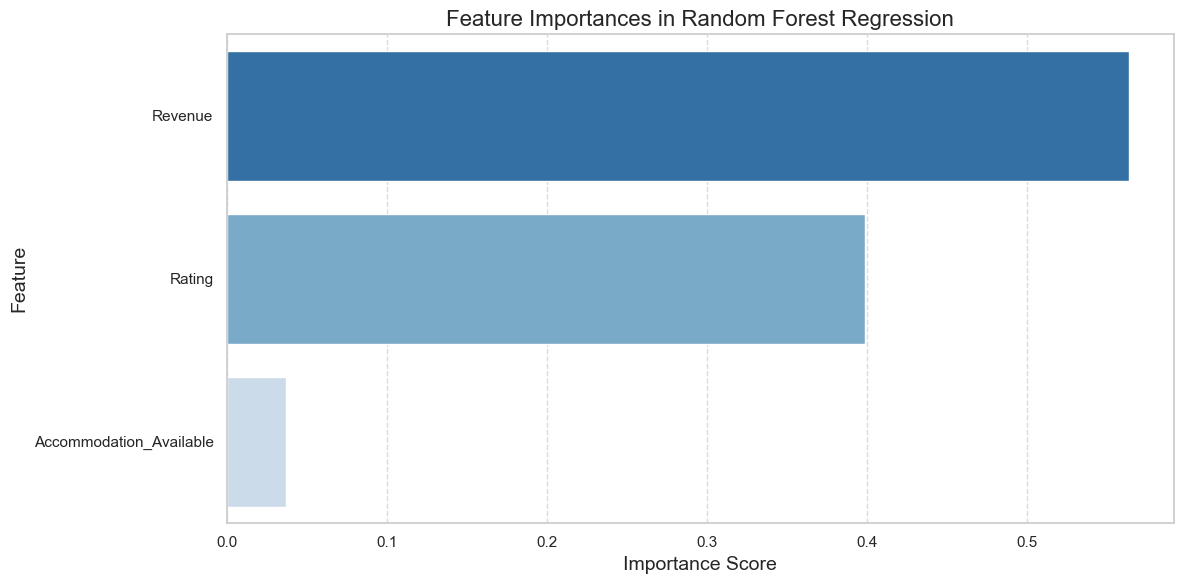

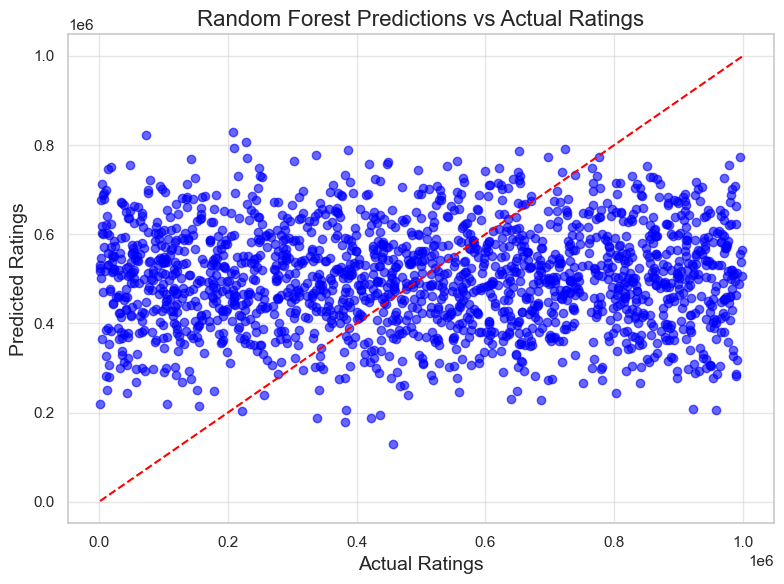

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Importance Bar Chart
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances, 
    palette='Blues_r'
)
plt.title('Feature Importances in Random Forest Regression', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Prediction vs. Actual Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest Predictions vs Actual Ratings', fontsize=16)
plt.xlabel('Actual Ratings', fontsize=14)
plt.ylabel('Predicted Ratings', fontsize=14)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


With a high MSE and negative R-Square, this model does not seem to be the best predictor as well. 

Next Steps: Focus towards the rating of the experiences being based on the category as well as visitors and accommodations available.

In [8]:
# Multiple Linear Regression Analysis
# One-hot encode the experience types
tourism_data = pd.get_dummies(data, columns=['Category'], drop_first=True)

# Define features (X) and target (y)
X = tourism_data[['Visitors', 'Accommodation_Available'] + [col for col in tourism_data.columns if 'Category_' in col]]
y = tourism_data['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print MSE and R-Squared
print(f"Multiple Linear Regression Mean Squared Error: {mse}")
print(f"Multiple Linear Regression R-squared: {r_squared}")

# Coefficients to interpret feature impact
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print("Feature Coefficients:\n", coefficients)

Multiple Linear Regression Mean Squared Error: 1.3562301240078753
Multiple Linear Regression R-squared: -0.0042455533691556635
Feature Coefficients:
                    Feature   Coefficient
0                 Visitors -1.065378e-07
1  Accommodation_Available  1.220091e-02
2           Category_Beach  6.706707e-02
3        Category_Cultural -2.957644e-02
4      Category_Historical -2.428359e-02
5          Category_Nature -3.750274e-02
6           Category_Urban -6.019096e-03


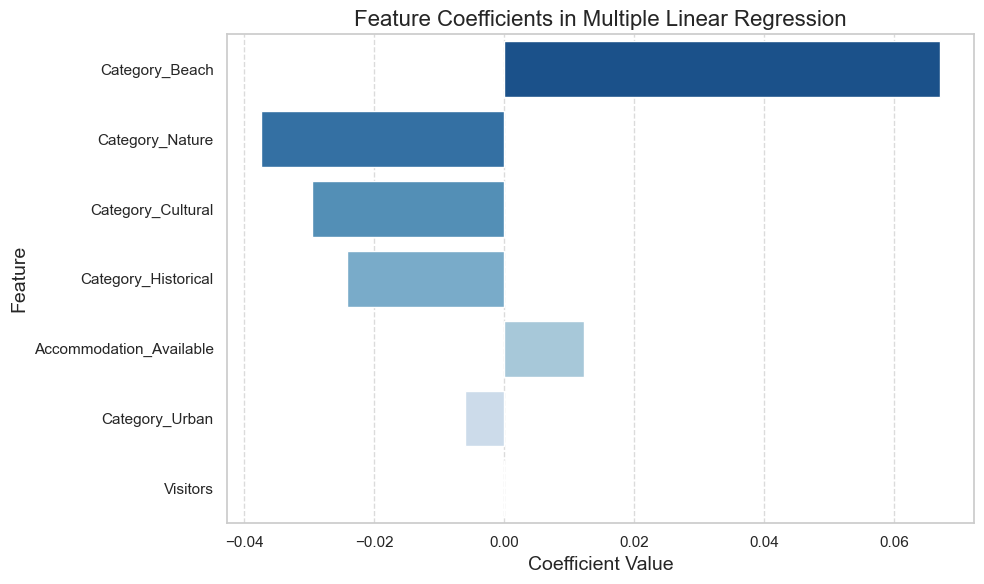

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort coefficients by absolute value for better visualization
coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='abs_coefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coefficients_sorted, 
    palette='Blues_r'
)
plt.title('Feature Coefficients in Multiple Linear Regression', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
